In [1]:
#Import required packages
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input


In [3]:
#Import opencv library
import cv2

In [6]:
#Read all the closed and open eyes images 
import os
classes=['closed_eyes','open_eyes']
def create_training_Data():
    for category in classes:
        path = os.path.join('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01 - Copy - Copy',category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # Reading images in grayscale.
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)     # changing the channel of image from 1 to 3.
            new_array = cv2.resize(backtorgb,(150,150))            #Resizing image to 150x150.
            training_data.append(new_array/255.0)               #Normalizing each image between 0 and 1.
            label.append(class_num)                         #Appending class of each image.

In [7]:
training_data=[]
label=[]
create_training_Data()

In [8]:
#Size of total training image
len(training_data)

16096

0


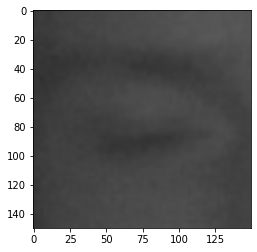

In [9]:
#Randomly printing one image
plt.imshow(training_data[0])
print(label[0])

In [10]:
#Shuffle all the images available 
from sklearn.utils import shuffle
X, y = shuffle(training_data, label, random_state=0)

1


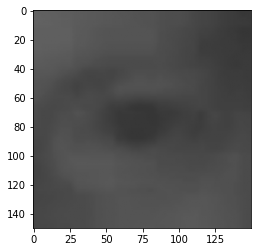

In [11]:
plt.imshow(X[456])
print(y[456])

In [12]:
len(X)

16096

In [15]:
training_data=[]

In [16]:
#Converting all images and corresponding labels to numpy array
X = np.array(X)
y= np.array(y)

In [17]:
len(X)

16096

In [18]:
#Shape of final image
X.shape

(16096, 150, 150, 3)

In [19]:
#Shape of labels
y.shape

(16096,)

# CNN

In [2]:
#Downloading Pretrained model VGG16
basemodel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3)))
basemodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [20]:
headModel = basemodel.output  #Output of basemodel
headModel = Flatten(name="flatten")(headModel)  # Flatten layer
headModel = Dense(64, activation="relu")(headModel)  # First hidden layer
headModel = Dense(1, activation="sigmoid")(headModel)  # Output layer

# Making pretrained layers training as False
for layer in basemodel.layers:
    layer.trainable = False

model = Model(inputs=basemodel.input, outputs=headModel) #Final Model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
#COmpiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self,epoch,logs={}):
#         if logs.get('accuracy')>0.9:
#             print("\nAccuracy is achieved. So cancelling training!")
#             self.model.stop_training=True

In [23]:
# newcallbacks=myCallback

In [24]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping()
H = model.fit(X,y,epochs=40,validation_split=0.2)   #Training the model

Train on 12876 samples, validate on 3220 samples
Epoch 1/40
12876/12876 [==============================] - 651s 51ms/sample - loss: 0.1882 - accuracy: 0.9334 - val_loss: 0.0752 - val_accuracy: 0.9795
Epoch 2/40
12876/12876 [==============================] - 622s 48ms/sample - loss: 0.0663 - accuracy: 0.9790 - val_loss: 0.0373 - val_accuracy: 0.9888
Epoch 3/40
12876/12876 [==============================] - 622s 48ms/sample - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0250 - val_accuracy: 0.9925
Epoch 4/40
12876/12876 [==============================] - 621s 48ms/sample - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.0272 - val_accuracy: 0.9913
Epoch 5/40
12876/12876 [==============================] - 622s 48ms/sample - loss: 0.0345 - accuracy: 0.9882 - val_loss: 0.0161 - val_accuracy: 0.9953
Epoch 6/40
12876/12876 [==============================] - 621s 48ms/sample - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0155 - val_accuracy: 0.9950
Epoch 7/40
12876/12876 [=====================

In [25]:
#Saving the model
model.save('drowsiness_model_vgg_best.h5')

[INFO] Training curve with loss and accuracy********


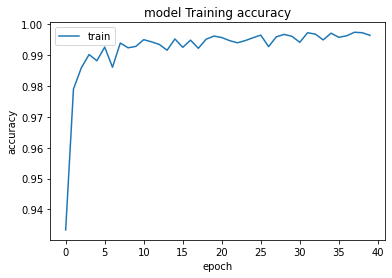

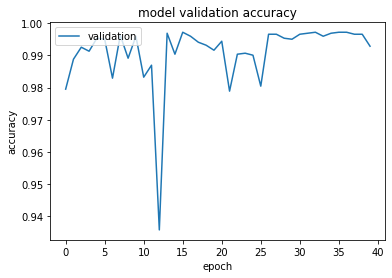

In [26]:
#Printing the training accuracy and validation accuracy of above model

print("[INFO] Training curve with loss and accuracy********")
#  "Accuracy"
plt.plot(H.history['accuracy'])
plt.title('model Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# "Loss"
plt.plot(H.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'], loc='upper left')
plt.show()

# Prediction

##### 

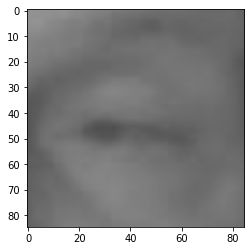

In [27]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('s0023_00025_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [28]:
type(X[0][0][0][0])

numpy.float64

In [29]:
type(new_image[0][0][0][0])

numpy.float64

In [30]:
prediction = model.predict(new_image)
prediction

array([[0.8863286]], dtype=float32)

In [ ]:
new_input_array.shape

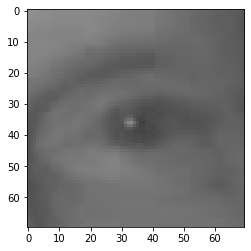

In [31]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('s0023_00300_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [32]:
prediction = model.predict(new_image)
prediction

array([[1.]], dtype=float32)

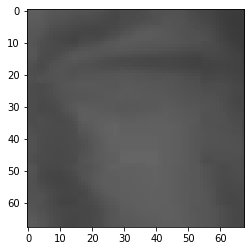

In [33]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('s0028_00007_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [34]:
prediction = model.predict(new_image)
prediction

array([[0.294061]], dtype=float32)

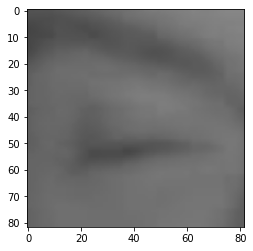

In [35]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00009_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [36]:
prediction = model.predict(new_image)
prediction

array([[0.00037458]], dtype=float32)

array([[0.999964]], dtype=float32)

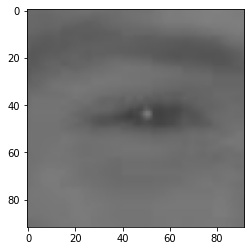

In [41]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00017_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)
prediction = model.predict(new_image)
prediction

array([[1.]], dtype=float32)

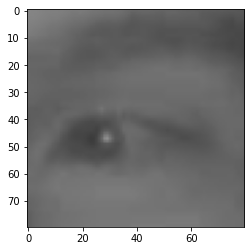

In [42]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00160_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)
prediction = model.predict(new_image)
prediction

array([[0.9797453]], dtype=float32)

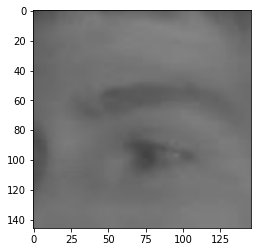

In [44]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00184_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)
prediction = model.predict(new_image)
prediction